In [2]:
%run ../../code/imports.ipynb

Set LOG_LEVEL="INFO" before running the import file to get moar output.
Set LOG_FORMAT to change log format.
Numpy (np): 2.2.6
Scipy (sp, stats): 1.16.0
Pandas (pd): 2.3.1
MatPlotLib (mpl, plt): 3.10.3
Seaborn (sns): 0.13.2
Scikit-Learn (sk): 1.7.1
Statsmodels (sm): 0.14.5
Patsy (pt): 1.0.1
SQLAlchemy (sa): 2.0.41
ROOT_DIR: 5150_Analytics
CODE_DIR: 5150_Analytics/code
DATA_DIR: 5150_Analytics/data
FIG_DIR: 5150_Analytics/labs_hw/project1/figures


In [7]:
df = pd.read_csv("../../data/CompustatAnnual.csv").query('2010 <= fyear < 2025')
df = df.merge(df['firm_id fyear at mve seq sale revt ni ib ebit ebitda invt rect'.split()].assign(fyear=lambda df: df.fyear + 1), on=['firm_id', 'fyear'], how='left', suffixes=('', '_lag'))

In [8]:
df.head()

,firm_id,tic,name,fyear,fiscal_year_end_month,age_days,at,act,lt,lct,...,mve_lag,seq_lag,sale_lag,revt_lag,ni_lag,ib_lag,ebit_lag,ebitda_lag,invt_lag,rect_lag
0,0,ATVK,AMERITEK VENTURES,2012,5,365,0.018,0.005,0.049,0.049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,ATVK,AMERITEK VENTURES,2013,5,730,0.000,0.000,0.047,0.047,...,23.275,-0.031,0.0,0.0,-0.061,-0.061,-0.056,-0.055,0.0,0.0
2,0,ATVK,AMERITEK VENTURES,2014,5,1095,0.264,0.000,0.062,0.062,...,39.900,-0.047,0.0,0.0,-0.067,-0.067,-0.052,-0.051,0.0,0.0
3,0,ATVK,AMERITEK VENTURES,2015,5,1461,0.000,0.000,0.081,0.081,...,41.400,0.202,0.0,0.0,-0.001,-0.001,-0.015,-0.015,0.0,0.0
4,0,ATVK,AMERITEK VENTURES,2016,5,1826,0.000,0.000,0.094,0.094,...,1.656,-0.081,0.0,0.0,-0.163,-0.163,-0.019,-0.019,0.0,0.0


In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
firm_id,113017.0,11526.35,6451.53,0.00,5709.00,12177.00,17348.00,21262.00
fyear,113017.0,2016.82,4.31,2010.00,2013.00,2017.00,2021.00,2024.00
fiscal_year_end_month,113017.0,10.53,2.99,1.00,12.00,12.00,12.00,12.00
age_days,113017.0,6421.35,5607.28,0.00,2191.00,4749.00,8766.00,27303.00
at,113017.0,15438.74,123671.69,0.00,43.12,435.86,2751.13,4349731.00
act,93129.0,1695.83,7969.64,-7.76,10.59,103.55,601.69,264889.39
lt,112856.0,12710.58,115496.67,-0.10,12.81,195.55,1709.49,4255074.00
lct,93343.0,1323.74,6775.62,0.00,5.07,44.13,333.83,227561.87
invt,111816.0,624.21,8736.93,0.00,0.00,1.25,55.69,530917.00
ap,112465.0,4740.08,59119.29,0.00,1.46,14.56,182.03,2462303.00


In [28]:
print((df.dropna(subset=['sale', 'cogs']).sale == 0).sum())
_ = df.query('sale != 0 and cogs.notnull()').assign(gross_margin=lambda df: (df.sale - df.cogs)/df.sale)
pd.DataFrame(
    [{
        'variable': c,
        'mean': _[c].mean(),
        'winzorized mean': _[c].clip(lower=(_1 := _[c].quantile(0.01)), upper=(_99 := _[c].quantile(0.99))).mean(),
        'min': _[c].min(),
        '1%': _1,
        '# < 1%': len(_.query(f'{c} < {_1}')),
        '25%': _[c].quantile(0.25),
        '50%': _[c].quantile(0.5),
        '75%': _[c].quantile(0.75),
        '99%': _99,
        'max': _[c].max(),
        '# > 99%': len(_.query(f'{c} > {_99}')),
    } for c in ['sale', 'cogs', 'gross_margin']
    ]).set_index('variable').round(2)

15062


,mean,winzorized mean,min,1%,# < 1%,25%,50%,75%,99%,max,# > 99%
variable,,,,,,,,,,,
sale,4486.72,3719.73,-24954.68,0.02,959,33.11,265.04,1650.28,81696.23,680985.00,977
cogs,2943.15,2305.95,-23105.16,0.00,227,15.03,127.48,953.72,54082.18,498780.00,977
gross_margin,-7.57,-0.85,-28202.00,-69.56,977,0.21,0.39,0.64,1.00,1281.68,385


In [10]:
df.auditor.value_counts()

auditor
Other                              30131
Ernst & Young                      18434
PricewaterhouseCoopers             17561
KPMG                               15541
Deloitte & Touche                  14336
Grant Thornton                      4525
BDO International                   4311
RSM                                 2000
Crowe Horwath                       1826
Moss Adams                          1004
BKD LLP                              739
EisnerAmper LLP                      516
Unaudited                            426
Plante & Moran                       356
CohnReznick LLP                      335
PKF International                    300
Moore Stephens                       295
Cherry Bekaert LLP                   276
CliftonLarsonAllen LLP                95
Touche Ross                            3
Altschuler, Melvoin and Glasser        3
Arthur Andersen                        2
Coopers & Lybrand                      2
Name: count, dtype: int64

| Week                                    | Focus & Learning Goals                                                                                                                                                      | Concrete Tasks                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | Deliverables                                                                                                                                                                                                                                                      |
| --------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1 — Data Intake & Cleaning**          | *Data wrangling, documentation*<br>• Understand Compustat structure (gvkey, datadate, SIC, consolidated vs. industrial formats).<br>• Clean raw variables; engineer ratios. | 1. **Subset**: Pull 2010-2024 US-domiciled industrial firms (consol = "C", indfmt = "INDL").<br>2. **Screen**: Drop fiscal-year duplicates, keep latest `datadate` per `gvkey`/fyear.<br>3. **Integrity checks**: • Negative sales? • Assets ≠ Liabilities + Equity diff > 1%.<br>4. **Winsorise** extreme values at 1st/99th pct. on all ratios.<br>5. **Engineer**: ROA, ROE, gross margin, leverage, accruals, Δreceivables/sales, Δinventory/sales, Δpp\&e/total assets.                                                                                                                | • Cleaning script (R/Python/SQL).<br>• Data dictionary of variables & transformations.<br>• 1–page memo summarising cleaning decisions & % of observations lost.                                                                                                  |
| **2 — Visual Diagnostics**              | *Exploratory graphics, storytelling*<br>• Spot distributional quirks and temporal trends.                                                                                   | 1. **Univariate**: Histograms of ROA, leverage, accruals (pre- & post-winsor).<br>2. **Time-series**: Median ROA and leverage by year (line charts).<br>3. **Bivariate**: Scatter of size (ln assets) vs. ROA with LOWESS curve; heat-map of Pearson correlations among engineered ratios.<br>4. **Industry lens**: Box-plots of accruals by 1-digit SIC.                                                                                                                                                                                                                                   | • Slide deck (5-7 slides) or Tableau/Power BI dashboard with annotated visuals.<br>• Short write-up highlighting at least three surprising patterns or outliers.                                                                                                  |
| **3 — Red-Flag Exploration & Insights** | *Descriptive analytics, simple modelling*<br>• Compute canonical distress/manipulation scores and probe their drivers.                                                      | 1. **Beneish M-Score**: Use eight Compustat ratios (DSRI, GMI, AQI, SGI, DEPI, SGAI, LVGI, TATA). Classify firms > -2.22 as “suspect”.<br>2. **Altman-Z (re-est. for non-manufacturers)**: Flag Z < 1.8.<br>3. **Cross-tab**: % of flagged firms by year and industry; overlaps between the two models.<br>4. **Deep-dive**: Pick one flagged firm each year with extreme metrics and craft a short case narrative using only Compustat fields (e.g., sales surge + receivable spike).<br>5. **Stretch (optional)**: K-means cluster firms on five ratios; visualise clusters in 2-D (PCA). | • Final report (≈8 pages or 10-slide deck) explaining methodology, key findings, and at least two actionable insights for auditors/investors.<br>• Annotated code notebook.<br>• Peer-review session: each team critiques another team’s flagged-firm narratives. |


Write an outline for a 3 week project for my accounting analytics class. The project is to investigate FSA ratios across groups. I will suggest some ratios, give the equations, and suggest groups, based on the table & variable definitions below.

Please write an outline that has the following steps (feel free to add more if it is helpful to the students):
1. Assignment Description
     1. Learning Objectives 
     2. Submission Expectations 
     3. Rubric and Grading 
2. Data
3. Steps
     1. Download and Load Data
     2. Get to know data
     3. Choose one/a few FSA ratios and groups, exploratory analysis of data
     4. Pose a hypothesis about the FSA ratio(s) across group(s), discuss what it might mean, motivation, conclusion, etc.
     5. "Test" your hypothesis, not a statistical test, but show differences/changes/etc.
4. Output - output should be a slide-deck of a few slides, describing data, cleaning choices, hypothesis, conclusion

| **Ratio**                       | **Formula**                                          | **Industry**                                | **Firm Age**                       | **Firm Size**                             |
| ------------------------------- | ---------------------------------------------------- | ------------------------------------------- | ---------------------------------- | ----------------------------------------- |
| **Gross Margin**                | `(Revenue - COGS) / Revenue`                         |   Varies widely (e.g., software vs. retail) |                                    |   Economies of scale may increase it      |
| **Operating Margin**            | `EBIT / Revenue`                                     |   Capital vs. labor-intensive firms         |   Improves with scale and learning |   Larger firms may have better margins    |
| **ROA (Return on Assets)**      | `Net Income / Avg Total Assets`                      |   Asset-light vs. asset-heavy               |   Increases with maturity          |   Larger firms often more efficient       |
| **ROE (Return on Equity)**      | `Net Income / Avg Shareholders' Equity`              |   Influenced by leverage norms              |   Mature firms may stabilize       |   May be inflated by buybacks             |
| **Current Ratio**               | `Current Assets / Current Liabilities`               |   Manufacturing > tech                      |   Young firms may hoard cash       |   Larger firms more efficient in WC       |
| **Quick Ratio**                 | `(Current Assets - Inventory) / Current Liabilities` |   Retail (low) vs. services (high)          |   Low for new firms                |   Stronger liquidity with size            |
| **Inventory Turnover**          | `COGS / Avg Inventory`                               |   Retail/high-volume > SaaS                 |                                    |   Larger firms better supply chains       |
| **Receivables Turnover**        | `Revenue / Avg Accounts Receivable`                  |   Varies by sales model                     |   Slower turnover in early stages  |   Larger firms may negotiate better terms |
| **Debt/Equity**                 | `Total Debt / Shareholders’ Equity`                  |   Utilities > Tech                          |   Increases with access to capital |   Large firms access capital markets      |
| **Interest Coverage**           | `EBIT / Interest Expense`                            |   Capital-intensive firms vary              |   Grows with earnings stability    |   Larger firms usually better             |
| **CapEx / Sales**               | `Capital Expenditures / Revenue`                     |   Telecom > Services                        |   Higher for young firms           |   Declines with maturity                  |
| **R\&D / Sales**                | `R&D Expense / Revenue`                              |   Pharma/Tech > Industrials                 |   High in early-stage firms        |                                           |
| **SG\&A / Sales**               | `SG&A Expense / Revenue`                             |   Lean ops vs. high-touch                   |   Declines with experience         |   Economies of scale reduce it            |
| **Free Cash Flow / Net Income** | `(Operating CF - CapEx) / Net Income`                |   More stable in mature industries          |   Negative in early years          |   Improves with efficiency                |
| **Revenue Growth (YoY)**        | `(Revenue_t - Revenue_{t-1}) / Revenue_{t-1}`        |   High-growth sectors differ                |   Higher in young firms            |   Slower growth for larger firms          |


  * Revenue = `sale`
  * COGS = `cogs`
  * EBIT = `ebit`
  * Net Income = `ni`
  * Avg Total Assets = `(at + at_lag) / 2`
  * Avg Shareholders Equity = `(seq + seq_lag) / 2`
  * Current Assets = `act`
  * Current Liabilities = `lct`
  * Avg Inventory = `(invt + invt_lag) / 2`
  * Avg Accounts Receivable = `(rect + rect_lag) / 2`
  * Total Debt = `total_debt`
  * Shareholders’ Equity = `seq`
  * Interest Expense = `xint`
  * Capital Expenditures = `capx`
  * R&D Expense = `xrd`
  * SG&A Expense = `xsga`
  * Operating CF = `oancf`

In [ ]:
df['fsa_gross_margin'] = (df['revt'] - df['cogs']) / df['revt']
df['fsa_gross_margin_gt0'] = df['fsa_gross_margin'].where(df['fsa_gross_margin'].between(0, 1), np.nan)
df['fsa_operating_margin'] = df['ebit'] / df['revt']
df['fsa_roa'] = df['ni'] / (df['at'] + df['at_lag']) * 2
df['fsa_roe'] = df['ni'] / (df['seq'] + df['seq_lag']) * 2
df['fsa_current_ratio'] = df['act'] / df['lct']
df['fsa_quick_ratio'] = (df['act'] - df['invt']) / df['lct']
df['fsa_inventory_turnover'] = df['cogs'] / (df['invt'] + df['invt_lag']) * 2
df['fsa_receivables_turnover'] = df['revt'] / (df['rect'] + df['invt_lag']) * 2
df['fsa_debt_equity'] = df['total_debt'] / df['seq']
df['fsa_interest_coverage'] = df['ebit'] / df['xint']
df['fsa_capex_sales'] = df['capx'] / df['sale']
df['fsa_rd_sales'] = df['xrd'].fillna(0) / df['sale']
df['fsa_sga_sales'] = df['xsga'] / df['sale']
df['fsa_fcf_net_income'] = (df['oancf'] - df['capx']) / df['ni']
df['fsa_revenue_growth'] = (df['revt'] - df['revt_lag']) / df['revt_lag']

df = df.replace([np.inf, -np.inf], np.nan)

In [12]:
df['sale cogs fsa_gross_margin fsa_gross_margin_gt0'.split()].assign(cm=lambda df: df['sale'] - df['cogs']).describe(percentiles=[.01, *[i/10 for i in range(10)], .99]).round(2).T

,count,mean,std,min,0%,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
sale,112723.0,3887.67,18699.45,-24954.68,-24954.68,0.00,0.00,1.80,18.10,55.15,144.57,348.88,788.38,1939.23,6315.86,73484.13,680985.00
cogs,112726.0,2550.09,13868.38,-23105.16,-23105.16,0.00,0.00,1.82,8.48,26.35,68.88,171.87,424.92,1136.32,3875.13,48051.50,498780.00
fsa_gross_margin,97658.0,-7.57,193.99,-28202.00,-28202.00,-69.56,0.03,0.17,0.25,0.32,0.39,0.48,0.59,0.70,0.83,1.00,1281.68
fsa_gross_margin_gt0,88262.0,0.47,0.25,0.00,0.00,0.04,0.15,0.23,0.29,0.36,0.43,0.52,0.62,0.72,0.84,0.99,1.00
cm,112720.0,1336.97,6483.74,-21536.00,-21536.00,-119.54,-0.05,0.00,4.59,20.50,55.30,132.96,294.84,685.10,2148.54,27117.85,343738.00


In [13]:
df['sale cogs fsa_gross_margin fsa_gross_margin_gt0'.split()].query('sale>1').assign(cm=lambda df: df['sale'] - df['cogs']).describe(percentiles=[.01, *[i/10 for i in range(10)], .99]).round(2).T

,count,mean,std,min,0%,1%,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
sale,91715.0,4778.95,20627.47,1.00,1.00,1.45,10.88,32.72,73.69,160.98,329.69,639.88,1276.73,2832.52,8681.42,85189.96,680985.00
cogs,91713.0,3133.90,15315.36,-8016.00,-8016.00,0.26,4.49,13.75,34.10,75.91,161.27,335.81,719.94,1677.46,5304.80,56462.55,498780.00
fsa_gross_margin,91713.0,0.10,4.57,-541.73,-541.73,-7.41,0.09,0.19,0.26,0.33,0.40,0.49,0.59,0.71,0.83,0.98,5.53
fsa_gross_margin_gt0,85784.0,0.46,0.25,0.00,0.00,0.04,0.15,0.23,0.29,0.36,0.43,0.51,0.61,0.72,0.83,0.97,1.00
cm,91713.0,1644.44,7152.37,-21536.00,-21536.00,-128.56,1.77,10.97,28.31,61.62,125.80,240.40,463.14,984.00,2888.50,31182.48,343738.00


In [14]:
df.groupby('fyear gics_sector_name'.split()).fsa_gross_margin_gt0.mean().reset_index().pivot(index='fyear', columns='gics_sector_name')

fsa_gross_margin_gt0                                        \
gics_sector_name Consumer Discretionary Consumer Staples    Energy Financials   
fyear                                                                           
2010                           0.378147         0.367888  0.463185   0.494311   
2011                           0.381769         0.359232  0.459345   0.543724   
2012                           0.386735         0.352406  0.457461   0.586064   
2013                           0.386104         0.359431  0.462352   0.617107   
2014                           0.382852         0.368057  0.445527   0.628774   
2015                           0.383660         0.369008  0.392497   0.625017   
2016                           0.384594         0.373162  0.395474   0.671782   
2017                           0.387294         0.375979  0.439336   0.675557   
2018                           0.386526         0.369353  0.440669   0.654926   
2019                           0.390615         0.371359  0.420901   0.643233   
2020                           0.386111         0.369197  0.379232   0.633998   
2021                           0.402478         0.354081  0.436534   0.700577   
2022                           0.398782         0.347553  0.481335   0.687448   
2023                           0.400776         0.356730  0.456463   0.564463   
2024                           0.400863         0.364851  0.447081   0.533289   

                                                                           \
gics_sector_name Health Care Industrials Information Technology Materials   
fyear                                                                       
2010                0.522101    0.315610               0.502665  0.322957   
2011                0.529701    0.307322               0.507586  0.351282   
2012                0.536937    0.310814               0.506079  0.332579   
2013                0.538904    0.308462               0.510095  0.308994   
2014                0.539891    0.308167               0.517138  0.305432   
2015                0.543851    0.315599               0.516648  0.301948   
2016                0.546377    0.320534               0.519450  0.335274   
2017                0.565743    0.318741               0.524046  0.346566   
2018                0.566476    0.313435               0.518676  0.346426   
2019                0.568595    0.325047               0.516177  0.332448   
2020                0.560368    0.326255               0.524826  0.363336   
2021                0.568250    0.327665               0.542914  0.385131   
2022                0.558760    0.320318               0.522151  0.357043   
2023                0.573951    0.333650               0.529344  0.347197   
2024                0.584950    0.342400               0.536017  0.362865   

                                                       
gics_sector_name Telecommunication Services Utilities  
fyear                                                  
2010                               0.500496  0.314881  
2011                               0.503009  0.323964  
2012                               0.476598  0.333609  
2013                               0.504900  0.346793  
2014                               0.493224  0.345070  
2015                               0.503535  0.365545  
2016                               0.513264  0.385172  
2017                               0.519731  0.377498  
2018                               0.498851  0.369479  
2019                               0.485339  0.386706  
2020                               0.482024  0.398878  
2021                               0.494457  0.379825  
2022                               0.486589  0.359225  
2023                               0.490775  0.382442  
2024                               0.502235  0.396422

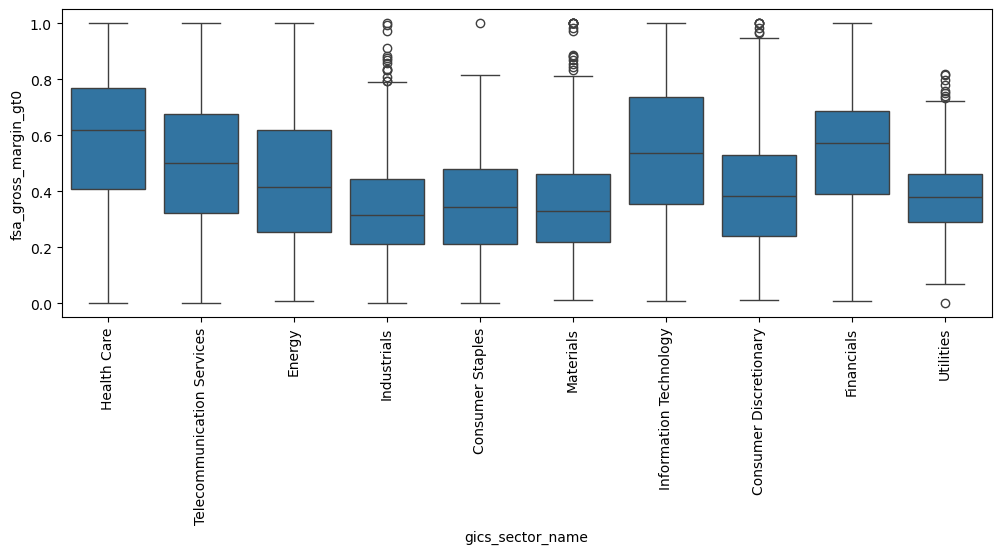

In [15]:
# Set default figsize to 12, 4
plt.figure(figsize=(12, 4))
sns.boxplot(data=df.query('fyear==2024'), x='gics_sector_name', y='fsa_gross_margin_gt0', legend=False)
# rotate x labels 90 degrees
_ = plt.xticks(rotation=90)

(1.0, 400000.0)

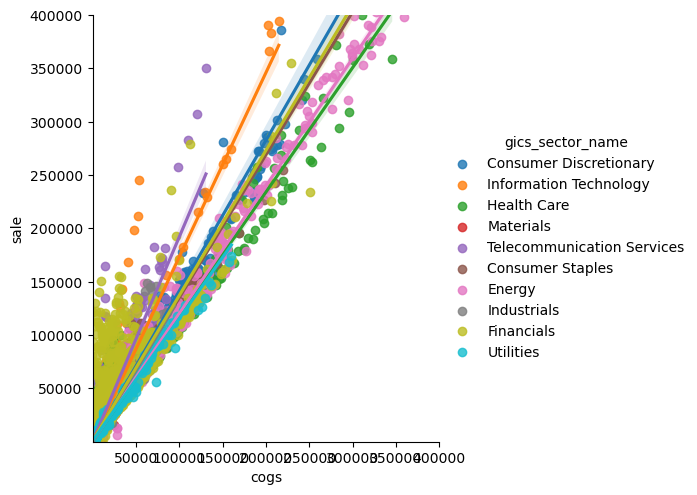

In [16]:
sns.lmplot(data=df, y='sale', x='cogs', hue='gics_sector_name')
plt.xlim(1, 4e5); plt.ylim(1, 4e5)

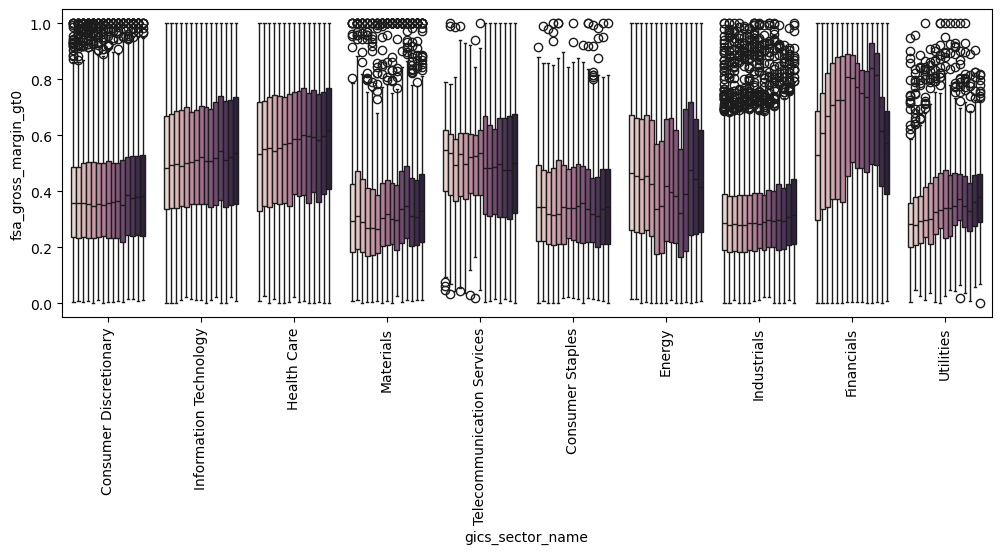

In [17]:
# Set default figsize to 12, 4
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='gics_sector_name', y='fsa_gross_margin_gt0', hue='fyear', legend=False)
# rotate x labels 90 degrees
_ = plt.xticks(rotation=90)

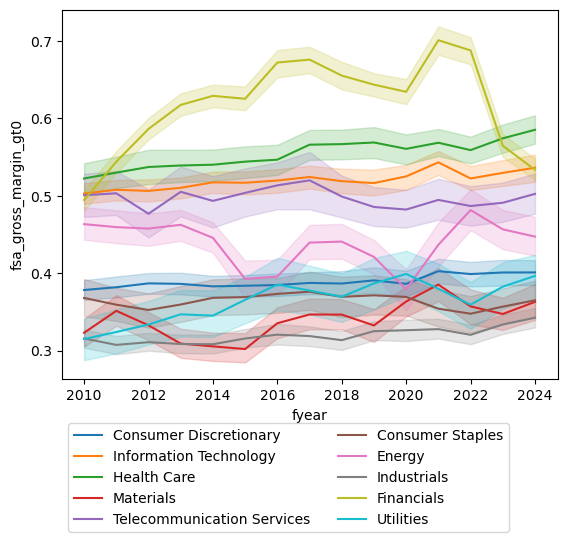

In [18]:
sns.lineplot(data=df, x='fyear', y='fsa_gross_margin_gt0', hue='gics_sector_name')
plt.legend(loc=2, bbox_to_anchor=(0, -0.1), ncols=2)